In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Assignment Part 1 : Counting the number of books in the image

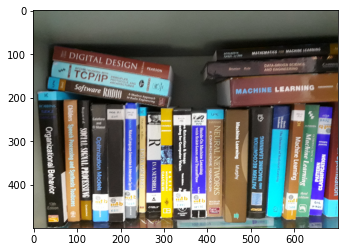

In [2]:
img_bookshelf = cv.imread('./Images/Bookshelf.jpg')
img_bookshelf = cv.resize(img_bookshelf, (700, 500), interpolation = cv.INTER_LINEAR) #(width, height)
cv.imshow('Original', img_bookshelf)
cv.waitKey(0)
cv.destroyAllWindows()
plt.imshow(img_bookshelf)

# Contours Detection after applying Threshold

In [4]:
img_bookshelfimg_bookshelf = cv.imread('./Images/Bookshelf.jpg')
img_bookshelf = cv.resize(img_bookshelf, (700, 500), interpolation = cv.INTER_LINEAR) #(width, height)

# Converting to Gray Scale
gray_img_bookshelf = cv.cvtColor(img_bookshelf, cv.COLOR_BGR2GRAY)
cv.imshow('Gray Image', gray_img_bookshelf)

# Blurring the image using Gaussian Blur with Kernel size (5, 5)
blur_gray_img_bookshelf = cv.GaussianBlur(gray_img_bookshelf, (5, 5), 0)
# blur_gray_img = cv.medianBlur(gray_img,25)
cv.imshow('Blur Image', blur_gray_img_bookshelf)

# Applying Binary Threshold on the image before contour detection
img_bookshelf_res, img_bookshelf_thresh = cv.threshold(blur_gray_img_bookshelf, 118, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
cv.imshow('Threshold Image', img_bookshelf_thresh)
print('Best Threshold =',img_bookshelf_res)w

# Applying Open Morphology on the threshold image
kernel = np.ones((5, 5), np.uint8)
img_bookshelf_opening = cv.morphologyEx(img_bookshelf_thresh, cv.MORPH_CLOSE, kernel)
cv.imshow('Close Morphology', img_bookshelf_opening)

# Contours Detection
contours, hierarchy = cv.findContours(img_bookshelf_opening, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Drawing the Contours on the original image
cv.drawContours(img_bookshelf, contours, -1, (0, 255, 0), 3)
cv.imshow('Contours Image', img_bookshelf)

# Printing the number of Contours ==> It also represents the number of objects in the image
print('Number of books in the shelf = ', len(contours))

cv.waitKey(0)
cv.destroyAllWindows()

Best Threshold = 115.0
Number of books in the shelf =  83


# Contours detection after applying Edge Detector

In [6]:
img_bookshelf_1 = cv.imread('./Images/Bookshelf1.jpg')
img_bookshelf_1 = cv.resize(img_bookshelf_1, (700, 500), interpolation = cv.INTER_LINEAR) #(width, height)

gray_img_bookshelf_1 = cv.cvtColor(img_bookshelf_1, cv.COLOR_BGR2GRAY)
cv.imshow('Gray Image', gray_img_bookshelf_1)

# Blurring the image using Gaussian Blur with Kernel size (9, 9)
blur_gray_img_bookshelf_1 = cv.GaussianBlur(gray_img_bookshelf_1, (13, 13), 0)
# blur_gray_img = cv.medianBlur(gray_img,25)
# blur_gray_img =  cv.bilateralFilter(gray_img, 15, 75, 75) 
cv.imshow('Blur Image', blur_gray_img_bookshelf_1)

# img_res, img_thresh = cv.threshold(blur_gray_img, 120, 255, cv.THRESH_BINARY)
# cv.imshow('Threshold image', img_thresh)

# Applying Edge Detection on the image before contour detection
# sobel_img = cv.Sobel(img_thresh, cv.CV_8UC1, 1, 0, ksize = -1)
canny_img_bookshelf_1 = cv.Canny(blur_gray_img_bookshelf_1, 50, 100)
cv.imshow('Canny Edge Image', canny_img_bookshelf_1)

# Closing the Gaps
# kernel = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))
# canny_img = cv.morphologyEx(canny_img, cv.MORPH_CLOSE, kernel)
# cv.imshow("Closed", canny_img)

# kernel = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))
# canny_img = cv.morphologyEx(canny_img, cv.MORPH_CLOSE, kernel)

# Contours Detection
img_bookshelf_1_contours, img_bookshelf_1_hierarchy = cv.findContours(canny_img_bookshelf_1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Drawing the Contours on the original image
cv.drawContours(img_bookshelf_1, img_bookshelf_1_contours, -1, (0, 255, 0), 3)
cv.imshow('Contours Image', img_bookshelf_1)

# Printing the number of Contours ==> It also represents the number of objects in the image
print('Number of books in the shelf = ', len(img_bookshelf_1_contours))

cv.waitKey(0)
cv.destroyAllWindows()

Number of books in the shelf =  78


# Assignment Part 2 : Identifying the Face Pixels in the image

In [ ]:
img_face = cv.imread('./Images/Rishabh_Pant.jpg')
img_face = cv.resize(img_face, (700, 500), interpolation = cv.INTER_LINEAR) #(width, height)
cv.imshow('Original', img_face)
cv.waitKey(0)
cv.destroyAllWindows()
plt.imshow(img_face)

# Segmentation using KMeans Clustering 

In [20]:
# Loading the image
img_face = cv.imread('./Images/Rishabh_Pant.jpg')
img_face = cv.resize(img_face, (700, 500), interpolation = cv.INTER_LINEAR) #(width, height)
cv.imshow('Original', img_face)

# Converting the image to RGB Color Space
gray_img_face = cv.cvtColor(img_face, cv.COLOR_BGR2RGB)
# gray_img_face = cv.cvtColor(img_face, cv.COLOR_RGB2BGR)
cv.imshow('Gray', gray_img_face)

# Noise Reduction using Gaussian Blur
blur_gray_img_face = cv.GaussianBlur(gray_img_face, (3, 3), 0)
cv.imshow('Blur', blur_gray_img_face)

# dst = cv.equalizeHist(gray_img)

Z = blur_gray_img_face.reshape((-1, 3))

# convert to np.float32
Z = np.float32(Z)

# Defining Criteria for K-Means Segmentation
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Setting the flags for K-Means for initial center allocation
flags = cv.KMEANS_RANDOM_CENTERS

# Setting the number of attempts
attempts = 2

# Setting no of clusters
k = 2

ret, label, center=cv.kmeans(Z, k, None, criteria, attempts, flags)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]

res2 = res.reshape((gray_img_face.shape))

res2 = np.array(res2).astype(np.uint8)

# Performing Histogram Equalization
# res2 = cv.equalizeHist(res2)

cv.imshow('Face',res2)

cv.waitKey(0)
cv.destroyAllWindows()

# Segmentation based on Color Space

**Visualizing the image in RGB Color Space**

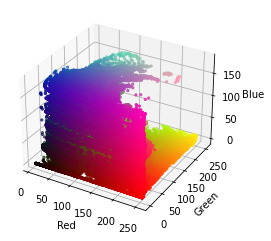

In [13]:
img1 = cv.imread('./Images/Rishabh_Pant.jpg')
img1 = cv.resize(img2, (700, 500), interpolation = cv.INTER_LINEAR) #(width, height)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img1)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = img1.reshape((np.shape(img1)[0]*np.shape(img1)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

# Visualizing the image in HSV Color Space

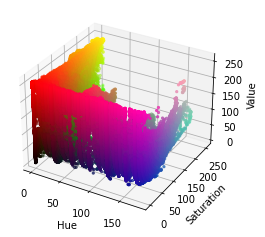

In [14]:
img2 = cv.imread('./Images/Rishabh_Pant.jpg')
img2 = cv.resize(img2, (700, 500), interpolation = cv.INTER_LINEAR) #(width, height)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img2)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [21]:
img_face = cv.imread('./Images/Rishabh_Pant.jpg')
img_face = cv.resize(img_face, (700, 500), interpolation = cv.INTER_LINEAR) #(width, height)
cv.imshow('Original', img_face)

img_face = cv.cvtColor(img_face, cv.COLOR_BGR2HSV)

img_face = cv.GaussianBlur(img_face, (7, 7), 0)

light_skin = (0, 70, 100)
dark_skin = (50, 200, 150)

mask = cv.inRange(img_face, light_skin, dark_skin)

result = cv.bitwise_and(img_face, img_face, mask=mask)

cv.imshow('Thresholded Color Spaace', result)

cv.waitKey(0)
cv.destroyAllWindows()

# Segmentation using Texture with Gabor Filter Bank

In [22]:
img_face = cv.imread('./Images/Rishabh_Pant.jpg')
img_face = cv.resize(img_face, (700, 500), interpolation = cv.INTER_LINEAR) #(width, height)
cv.imshow('Original ', img_face)

img_face = cv.cvtColor(img_face, cv.COLOR_BGR2GRAY)

ksize = 30
sigma = 0.9
theta = 1 * (np.pi / 4)
lamda = 1 * (np.pi / 1)
gamma = 0.5
phi = 0

gabor_kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma ,phi, ktype = cv.CV_32F)

filter_img_face = cv.filter2D(img_face, cv.CV_8UC3, gabor_kernel)

# cv.imshow('Kernel', gabor_kernel)
cv.imshow('After Gabor Filter', filter_img_face)

cv.waitKey(0)
cv.destroyAllWindows()

# Foreground Extraction using Grabcut

In [30]:
img_face = cv.imread('./Images/Rishabh_Pant.jpg')
img_face = cv.resize(img_face, (700, 500), interpolation = cv.INTER_LINEAR) #(width, height)
cv.imshow('Original ', img_face)

mask = np.zeros(img_face.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (100, 100, 400, 200)

cv.grabCut(img_face, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img2_face = img_face * mask2[:,:,np.newaxis]

cv.imshow('Grabcut', img2_face)

cv.waitKey(0)
cv.destroyAllWindows()